In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
%matplotlib inline

In [2]:
df_ess = pd.read_csv('ESSdata_Thinkful.csv', sep=',')

In [3]:
# Replace dataframe values with actual values for better visualization
df_ess['year'] = df_ess['year'].map({6: 2012, 7: 2014})
df_ess['gndr'] = df_ess['gndr'].map({1: 'Male', 2: 'Female'})
df_ess['partner'] = df_ess['partner'].map({1: 'Together', 2: 'Alone'})
df_ess['cntry'] = df_ess['cntry'].map({'CH': 'Switzerland',
                                'CZ': 'Czech Republic',
                                'DE': 'Denmark',
                                'ES': 'Spain',
                                'NO': 'Norway',
                                'SE': 'Sweden'})

df_ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,Switzerland,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,Female,60.0,Together
1,Switzerland,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,Female,59.0,Together
2,Switzerland,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,Male,24.0,Alone
3,Switzerland,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,Female,64.0,Together
4,Switzerland,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,Female,55.0,Together


## 1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c304358>,
      dtype=object)

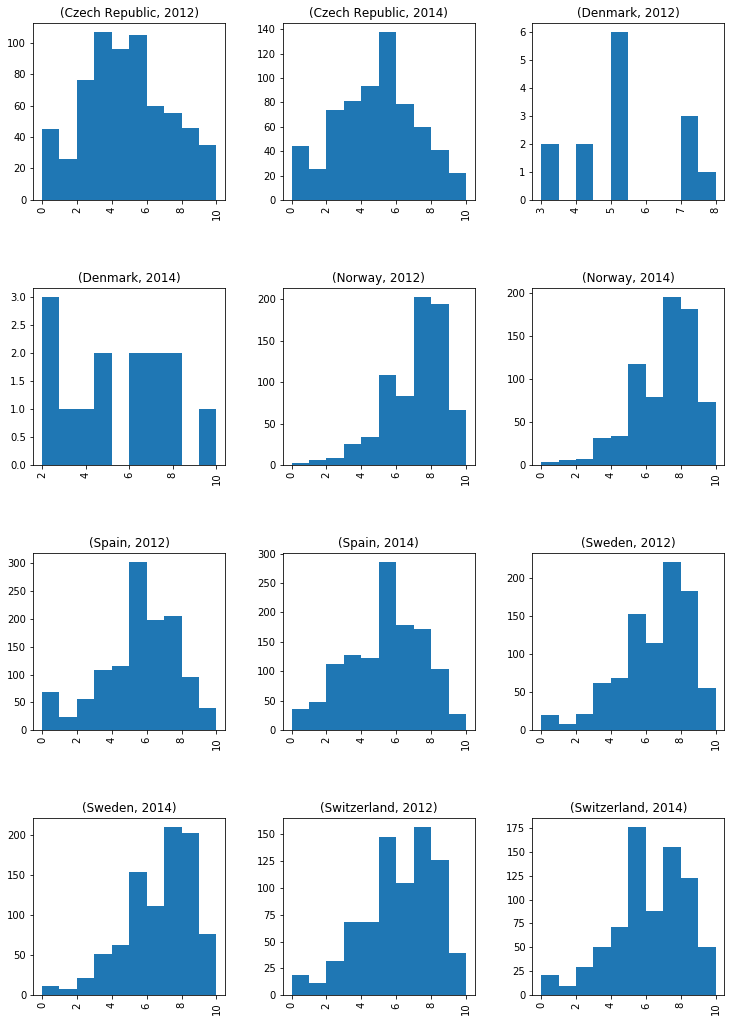

In [51]:
plt.rcParams['figure.figsize'] = [12,18]

df_ess.hist(by=['cntry', 'year'], column='ppltrst')

In [6]:
df_ess_dropna = df_ess.dropna()

country_list = ['Switzerland', 'Czech Republic', 'Denmark', 'Spain', 'Norway', 'Sweden']
years = [2012,2014]
alpha = 0.05

for country in country_list:
    df = df_ess_dropna[df_ess_dropna['cntry']==country]
    print(country)
    print()
    for year in years:
        stat, p = stats.shapiro(df['ppltrst'][df['year']==year])
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

Switzerland

  Statistics=0.952, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.955, p=0.000
  Sample does not look Gaussian (reject H0)

Czech Republic

  Statistics=0.968, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.972, p=0.000
  Sample does not look Gaussian (reject H0)

Denmark

  Statistics=0.893, p=0.107
  Sample looks Gaussian (fail to reject H0)

  Statistics=0.943, p=0.452
  Sample looks Gaussian (fail to reject H0)

Spain

  Statistics=0.949, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.966, p=0.000
  Sample does not look Gaussian (reject H0)

Norway

  Statistics=0.921, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.929, p=0.000
  Sample does not look Gaussian (reject H0)

Sweden

  Statistics=0.937, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.938, p=0.000
  Sample does not look Gaussian (reject H0)



- From the histogram analysis and shapiro-wilks test, we see that only data from Denmark could be said to come from a normal distribution. Thus we must use only non-parametric tests to compare the trust data between the countries. 

- To test the dependent groups within each country, the Wilcoxon Signed-Rank test is used. 

A non-parametric statistical hypothesis test used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test).


The hypothesis being test is:

Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.

Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero.

If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

In [217]:
country_list = ['Switzerland', 'Czech Republic', 'Denmark', 'Spain', 'Norway', 'Sweden']

alpha = 0.05

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==2012]
    df_2014 = df[df['year']==2014]

    print(country)
    print()

    stat, p = stats.wilcoxon(df_2012['ppltrst'],df_2014['ppltrst'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
        
    if p > alpha:
        print('  No statistical difference in distribution  (fail to reject H0)\n')
    else:
        print('  Statistical difference in distribution (reject H0)\n')

Switzerland

  Statistics=106278.500, p=0.441
  No statistical difference in distribution  (fail to reject H0)

Czech Republic

  Statistics=82837.000, p=0.293
  No statistical difference in distribution  (fail to reject H0)

Denmark

  Statistics=44.000, p=0.916
  No statistical difference in distribution  (fail to reject H0)

Spain

  Statistics=243475.500, p=0.006
  Statistical difference in distribution (reject H0)

Norway

  Statistics=85392.000, p=0.614
  No statistical difference in distribution  (fail to reject H0)

Sweden

  Statistics=130719.500, p=0.029
  Statistical difference in distribution (reject H0)



- From the Wilcoxon Signed-Rank test we see that the countries of Spain and Sweden can say that there exist a statistically significant difference between the 2012 and 2014 levels of trust. 

In [19]:
country_list = ['Spain','Sweden']

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==2012]
    df_2014 = df[df['year']==2014]

    print(country)
    print()

    diff = df_2012['ppltrst'].mean() - df_2014['ppltrst'].mean()
    # interpret
    print(diff) 
    print()
    if diff > 0:
        print('  Net trust increased between years.\n')
    else:
        print('  Net trust decreased between years.\n')

Spain

0.2194639274634893

  Net trust increased between years.

Sweden

-0.19921035485408023

  Net trust decreased between years.



- We see that trust averages increased in Spain, however decreased in Sweden.

## 2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

-  Similarly to the previous question, the data will be tested for normality and then compared with an appropriate test.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2302fa58>,
      dtype=object)

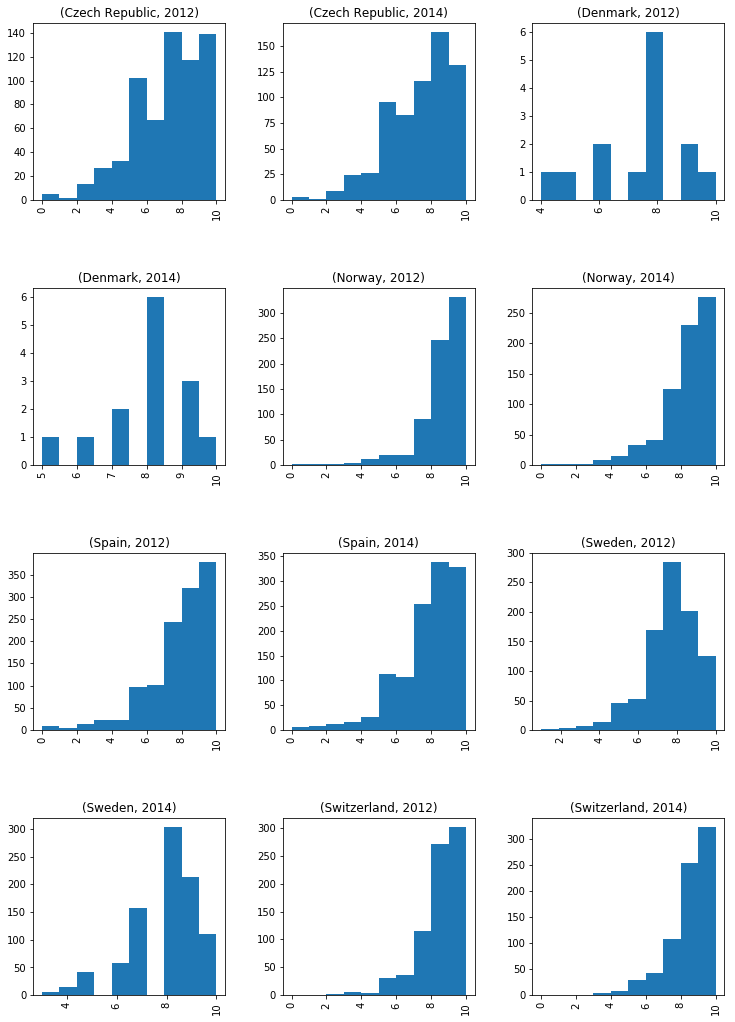

In [4]:
plt.rcParams['figure.figsize'] = [12,18]

df_ess.hist(by=['cntry', 'year'], column='happy')

- Upon inspection, none of the country distributions look anywhere near normal, however lets run a shapiro -wilks test to put a measure to it.

In [7]:
for country in country_list:
    df = df_ess_dropna[df_ess_dropna['cntry']==country]
    print(country)
    print()
    for year in years:
        stat, p = stats.shapiro(df['happy'][df['year']==year])
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

Switzerland

  Statistics=0.877, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.895, p=0.000
  Sample does not look Gaussian (reject H0)

Czech Republic

  Statistics=0.946, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.945, p=0.000
  Sample does not look Gaussian (reject H0)

Denmark

  Statistics=0.916, p=0.222
  Sample looks Gaussian (fail to reject H0)

  Statistics=0.921, p=0.230
  Sample looks Gaussian (fail to reject H0)

Spain

  Statistics=0.905, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.914, p=0.000
  Sample does not look Gaussian (reject H0)

Norway

  Statistics=0.850, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.880, p=0.000
  Sample does not look Gaussian (reject H0)

Sweden

  Statistics=0.903, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.912, p=0.000
  Sample does not look Gaussian (reject H0)



- As expected, only one country, Denamrk could be said to be derived from a normal distribution. Since the majority of countries are not Gaussian in form, we will apply a non parametric test, the Wilcoxon Signed-Rank test to compare happiness features within their respective countries.

In [8]:
for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==2012]
    df_2014 = df[df['year']==2014]

    print(country)
    print()

    stat, p = stats.wilcoxon(df_2012['happy'],df_2014['happy'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
        
    if p > alpha:
        print('  No statistical difference in distribution  (fail to reject H0)\n')
    else:
        print('  Statistical difference in distribution (reject H0)\n')

Switzerland

  Statistics=92816.500, p=0.821
  No statistical difference in distribution  (fail to reject H0)

Czech Republic

  Statistics=73213.000, p=0.011
  Statistical difference in distribution (reject H0)

Denmark

  Statistics=23.500, p=0.393
  No statistical difference in distribution  (fail to reject H0)

Spain

  Statistics=231958.500, p=0.049
  Statistical difference in distribution (reject H0)

Norway

  Statistics=67571.500, p=0.000
  Statistical difference in distribution (reject H0)

Sweden

  Statistics=125481.000, p=0.514
  No statistical difference in distribution  (fail to reject H0)



/Users/coreycoole/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/coreycoole/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


- From the Wilcoxon test we see that the Czech Republic, Spain, and Norway have statistically significant differences between the happiness records of the years of 2012 and 2014.

- lets take an average from each year to see if the trends of happiness decreased or increased.

In [17]:
country_list = ['Czech Republic','Norway','Spain']

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==2012]
    df_2014 = df[df['year']==2014]

    print(country)
    print()

    diff = df_2012['happy'].mean() - df_2014['happy'].mean()
    # interpret
    print(diff) 
    print()
    if diff > 0:
        print('  Net happiness increased between years.\n')
    else:
        print('  Net happiness decreased between years.\n')

Czech Republic

-0.1432125966305149

  Net happiness decreased between years.

Norway

0.33653471625046905

  Net happiness increased between years.

Spain

0.12871287128712883

  Net happiness increased between years.



- We see that Spain and Norway saw increases in happiness averages from 2012 and 2014, however the Czech Republic saw a decrease.

## 3) Who reported watching more TV in 2012, men or women?

In [4]:
df_2012 = df_ess[df_ess['year']==2012]
df_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,Switzerland,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,Female,60.0,Together
1,Switzerland,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,Female,59.0,Together
2,Switzerland,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,Male,24.0,Alone
3,Switzerland,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,Female,64.0,Together
4,Switzerland,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,Female,55.0,Together


In [29]:
print('Female total average: {}'.format(df_2012[df_2012['gndr']=='Female']['tvtot'].sum()))

Female total average: 8441.0


In [31]:
print('Male total average: {}'.format(df_2012[df_2012['gndr']=='Male']['tvtot'].sum()))

Male total average: 8393.0


- At a glance it seems females watched more tv that males, however we will test if these groups are statistically different to get a better picture. 

In [40]:
country_list = ['Switzerland', 'Czech Republic', 'Denmark', 'Spain', 'Norway', 'Sweden']

genders = ['Male','Female']

for country in country_list:
    df = df_ess_dropna[df_ess_dropna['cntry']==country]
    print(country)
    print()
    for gender in genders:
        stat, p = stats.shapiro(df['tvtot'][df['gndr']==gender])
        print(gender)
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

Switzerland

Male
  Statistics=0.947, p=0.000
  Sample does not look Gaussian (reject H0)

Female
  Statistics=0.945, p=0.000
  Sample does not look Gaussian (reject H0)

Czech Republic

Male
  Statistics=0.899, p=0.000
  Sample does not look Gaussian (reject H0)

Female
  Statistics=0.886, p=0.000
  Sample does not look Gaussian (reject H0)

Denmark

Male
  Statistics=0.900, p=0.184
  Sample looks Gaussian (fail to reject H0)

Female
  Statistics=0.880, p=0.039
  Sample does not look Gaussian (reject H0)

Spain

Male
  Statistics=0.935, p=0.000
  Sample does not look Gaussian (reject H0)

Female
  Statistics=0.934, p=0.000
  Sample does not look Gaussian (reject H0)

Norway

Male
  Statistics=0.948, p=0.000
  Sample does not look Gaussian (reject H0)

Female
  Statistics=0.950, p=0.000
  Sample does not look Gaussian (reject H0)

Sweden

Male
  Statistics=0.956, p=0.000
  Sample does not look Gaussian (reject H0)

Female
  Statistics=0.951, p=0.000
  Sample does not look Gaussian (rej

In [46]:
alpha = 0.05

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_tv_f = df[df['gndr']=='Female']
    df_tv_m = df[df['gndr']=='Male']

    print(country)
    print()

    stat, p = stats.mannwhitneyu(df_tv_f['tvtot'], df_tv_m['tvtot'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('  Same distribution (fail to reject H0)\n')
    else:
        print('  Different distribution (reject H0)\n')

Switzerland

  Statistics=281667.000, p=0.026
  Different distribution (reject H0)

Czech Republic

  Statistics=199064.000, p=0.021
  Different distribution (reject H0)

Denmark

  Statistics=93.500, p=0.462
  Same distribution (fail to reject H0)

Spain

  Statistics=721821.500, p=0.209
  Same distribution (fail to reject H0)

Norway

  Statistics=250741.500, p=0.028
  Different distribution (reject H0)

Sweden

  Statistics=407158.500, p=0.352
  Same distribution (fail to reject H0)



- The only statistical diffence in total tv averages are found in Switzerland, Czech Republic, and Norway. 

- Lets compare the total averages of these countries to see which gender watched more television.

In [49]:
country_list = ['Switzerland','Czech Republic','Norway']

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_tv_f = df[df['gndr']=='Female']
    df_tv_m = df[df['gndr']=='Male']

    print(country)
    
    
    f_total = df_tv_f['tvtot'].sum()
    m_total = df_tv_m['tvtot'].sum()
    
    if f_total > m_total:
        print('Females watched more tv.\n')
    else:
        print('Males watched more tv.\n')

Switzerland
Males watched more tv.

Czech Republic
Females watched more tv.

Norway
Males watched more tv.



- We see that Males watched more tv in Switzerland and Norway, however in Czech Republic, femals watched more.

## 4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [11]:
df_2012 = df_ess[df_ess['year']==2012]

country_list = ['Switzerland', 'Czech Republic', 'Denmark', 'Spain', 'Norway', 'Sweden']

partners = ['Together','Alone']

alpha = 0.05

for country in country_list:
    df = df_2012[df_2012['cntry']==country]
    print(country)
    print()
    for pt in partners:
        stat, p = stats.shapiro(df['pplfair'][df['partner']==pt])
        print(pt)
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

Switzerland

Together
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Alone
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Czech Republic

Together
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Alone
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Denmark

Together
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Alone
  Statistics=0.852, p=0.201
  Sample looks Gaussian (fail to reject H0)

Spain

Together
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Alone
  Statistics=0.959, p=0.000
  Sample does not look Gaussian (reject H0)

Norway

Together
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Alone
  Statistics=0.930, p=0.000
  Sample does not look Gaussian (reject H0)

Sweden

Together
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

Alone
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to rej

- We see that the majority of samples could be said to come from the normal distribution, however both Spain and Norway's 'Alone' destinction do not appear normally distributed. Thusly we will have to compare the fairness feature in these countries non-parametricly.

In [18]:
df_2012_dropnna = df_2012.dropna()

country_list = ['Switzerland', 'Czech Republic', 'Denmark', 'Sweden']

alpha = 0.05

for country in country_list:
    df = df_2012_dropna[df_2012_dropna['cntry']==country]
    
    df_tv_t = df[df['partner']=='Together']
    df_tv_a = df[df['partner']=='Alone']

    print(country)
    print()

    stat, p = stats.ttest_ind(df_tv_t['pplfair'], df_tv_a['pplfair'], equal_var = False)
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    
    if p > alpha:
        print('  Same distribution (fail to reject H0)\n')
    else:
        print('  Different distribution (reject H0)\n')

Switzerland

  Statistics=2.207, p=0.028
  Different distribution (reject H0)

Czech Republic

  Statistics=0.592, p=0.554
  Same distribution (fail to reject H0)

Denmark

  Statistics=2.689, p=0.025
  Different distribution (reject H0)

Sweden

  Statistics=2.770, p=0.006
  Different distribution (reject H0)



- By the results of the t-test for independent samples we see that only Czech Republic's partner distinction is not statistically significant in the fairness feature.

- Lets look at the remaining country's fairness records to compare.

In [22]:
country_list = ['Switzerland','Czech Republic','Denmark', 'Sweden']

for country in country_list:
    df = df_2012_dropna[df_2012_dropna['cntry']==country]
    
    df_tv_t = df[df['partner']=='Together']
    df_tv_a = df[df['partner']=='Alone']

    print(country)
    
    
    t_avg = df_tv_t['pplfair'].mean()
    a_avg = df_tv_a['pplfair'].mean()
    
    if t_avg > a_avg:
        print('People who lived with a partner felt that people were fairer in 2012.\n')
    else:
        print('People who lived alone felt that people were fairer in 2012.\n')

Switzerland
People who lived with a partner felt that people were fairer in 2012.

Czech Republic
People who lived with a partner felt that people were fairer in 2012.

Denmark
People who lived with a partner felt that people were fairer in 2012.

Sweden
People who lived with a partner felt that people were fairer in 2012.



- The results of the normally distributed fairness feature is very conclusive, in all countries, people who lived with a partner felt that people were treated them with more fairness than those who lived by themselves.

- Lets test the non-normal fairness data now.

In [23]:
country_list = ['Norway', 'Spain']

alpha = 0.05

for country in country_list:
    df = df_2012_dropna[df_2012_dropna['cntry']==country]
    
    df_t = df[df['partner']=='Together']
    df_a = df[df['partner']=='Alone']

    print(country)
    print()

    stat, p = stats.mannwhitneyu(df_t['pplfair'], df_a['pplfair'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    
    if p > alpha:
        print('  Same distribution (fail to reject H0)\n')
    else:
        print('  Different distribution (reject H0)\n')

Norway

  Statistics=54483.000, p=0.177
  Same distribution (fail to reject H0)

Spain

  Statistics=155984.000, p=0.461
  Same distribution (fail to reject H0)



- There does not seem to be a statistical difference between the non-normally distributed fairness data of Norway or Spain, thus we conclude there is no difference between the fiarness records of people living alone or together in these countries.

## 5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [27]:
df_2014_dropna = df_ess[df_ess['year']==2014].dropna()

country_list = ['Switzerland','Czech Republic','Denmark', 'Sweden']

alpha = 0.05

for country in country_list:
    df = df_2014_dropna[df_2014_dropna['cntry']==country]
    print(country)
    print()
    
    stat, p = stats.shapiro(df['sclmeet'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
        
    if p > alpha:
        print('  Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('  Sample does not look Gaussian (reject H0)\n')

Switzerland

  Statistics=0.898, p=0.000
  Sample does not look Gaussian (reject H0)

Czech Republic

  Statistics=0.944, p=0.000
  Sample does not look Gaussian (reject H0)

Denmark

  Statistics=0.862, p=0.032
  Sample does not look Gaussian (reject H0)

Sweden

  Statistics=0.878, p=0.000
  Sample does not look Gaussian (reject H0)



In [42]:
# Kruskal-Wallace Test

Switzerland = df_2014_dropna[df_2014_dropna['cntry']=='Switzerland']['sclmeet']
Czech_Republic = df_2014_dropna[df_2014_dropna['cntry']=='Czech Republic']['sclmeet']
Denmark = df_2014_dropna[df_2014_dropna['cntry']=='Denmark']['sclmeet']
Sweden = df_2014_dropna[df_2014_dropna['cntry']=='Sweden']['sclmeet']

print('Switzerland:\navg = {}, std =  {}\n'.format(Switzerland.mean(), Switzerland.std()))
print('Czech Republic: \navg = {}, std = {}\n'.format(Czech_Republic.mean(), Czech_Republic.std()))
print('Denmark:\navg = {}, std = {}\n'.format(Denmark.mean(), Denmark.std()))
print('Sweden:\navg = {}, std = {}'.format(Sweden.mean(), Sweden.std()))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(Switzerland,Czech_Republic,Denmark,Sweden)
    

Switzerland:
avg = 5.174966352624495, std =  1.3016961639257436

Czech Republic: 
avg = 4.4950495049504955, std = 1.4712029982324069

Denmark:
avg = 4.428571428571429, std = 0.7559289460184544

Sweden:
avg = 5.434832756632065, std = 1.3707047338425682


KruskalResult(statistic=162.23842058345167, pvalue=6.026207477104715e-35)

- From the Kruskal-Wallace Test it seems the records of social meetings are statistically disticnt between the four countries, Sweden has the highest social meeting likelihood, while Denmark has the lowest.

## 6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [149]:
df_2014_dropna = df_ess[df_ess['year']==2014].dropna()

df_2014_dropna['age_bins'] = pd.cut(x=df_2014_dropna['agea'], 
                                    bins=[14, 30, 45, 60, 75, 120],
                                   labels = ['14-30','30-45', '45-60', '60-75','75-120'])

In [150]:
country_list = ['Switzerland','Czech Republic', 'Sweden']

bin_list = ['14-30','30-45', '45-60', '60-75','75-120']

alpha = 0.05

for country in country_list:
    
    df = df_2014_dropna[df_2014_dropna['cntry']==country]
    print(country)
    print()
    
    for binn in bin_list:
        
        df_bin = df[df['age_bins']==binn]
        print(binn)                                                               
        stat, p = stats.shapiro(df_bin['sclmeet']) 
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

Switzerland

14-30
  Statistics=0.817, p=0.000
  Sample does not look Gaussian (reject H0)

30-45
  Statistics=0.891, p=0.000
  Sample does not look Gaussian (reject H0)

45-60
  Statistics=0.914, p=0.000
  Sample does not look Gaussian (reject H0)

60-75
  Statistics=0.900, p=0.000
  Sample does not look Gaussian (reject H0)

75-120
  Statistics=0.933, p=0.008
  Sample does not look Gaussian (reject H0)

Czech Republic

14-30
  Statistics=0.889, p=0.000
  Sample does not look Gaussian (reject H0)

30-45
  Statistics=0.938, p=0.000
  Sample does not look Gaussian (reject H0)

45-60
  Statistics=0.942, p=0.000
  Sample does not look Gaussian (reject H0)

60-75
  Statistics=0.940, p=0.000
  Sample does not look Gaussian (reject H0)

75-120
  Statistics=0.940, p=0.586
  Sample looks Gaussian (fail to reject H0)

Sweden

14-30
  Statistics=0.816, p=0.000
  Sample does not look Gaussian (reject H0)

30-45
  Statistics=0.826, p=0.000
  Sample does not look Gaussian (reject H0)

45-60
  Stati

In [168]:
# Kruskal-Wallace Test

Switzerland = df_2014_dropna[df_2014_dropna['cntry']=='Switzerland']
Czech_Republic = df_2014_dropna[df_2014_dropna['cntry']=='Czech Republic']
Sweden = df_2014_dropna[df_2014_dropna['cntry']=='Sweden']

#country_list = ['Switzerland','Czech Republic', 'Sweden']
bin_list = ['14-30','30-45', '45-60', '60-75','75-120']

print('Switzerland')
for binn in bin_list:
    print('{}: avg = {}, std = {}'.format(binn, Switzerland[Switzerland['age_bins']==binn]['sclmeet'].mean(),
                                         Switzerland[Switzerland['age_bins']==binn]['sclmeet'].std()))
print('Czech Republic')
for binn in bin_list:
    print('{}: avg = {}, std = {}'.format(binn, Czech_Republic[Czech_Republic['age_bins']==binn]['sclmeet'].mean(),
                                         Czech_Republic[Czech_Republic['age_bins']==binn]['sclmeet'].std()))
print('Sweden')
for binn in bin_list:
    print('{}: avg = {}, std = {}'.format(binn, Sweden[Sweden['age_bins']==binn]['sclmeet'].mean(),
                                         Sweden[Sweden['age_bins']==binn]['sclmeet'].std()))



# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
print()
print('14-30:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_bins']=='14-30']['sclmeet'],
              Czech_Republic[Czech_Republic['age_bins']=='14-30']['sclmeet'],
              Sweden[Sweden['age_bins']=='14-30']['sclmeet'])))
print('30-45:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_bins']=='30-45']['sclmeet'],
              Czech_Republic[Czech_Republic['age_bins']=='30-45']['sclmeet'],
              Sweden[Sweden['age_bins']=='30-45']['sclmeet'])))
print('45-60:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_bins']=='45-60']['sclmeet'],
              Czech_Republic[Czech_Republic['age_bins']=='45-60']['sclmeet'],
              Sweden[Sweden['age_bins']=='45-60']['sclmeet'])))
print('60-75:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_bins']=='60-75']['sclmeet'],
              Czech_Republic[Czech_Republic['age_bins']=='60-75']['sclmeet'],
              Sweden[Sweden['age_bins']=='60-75']['sclmeet'])))
print('75-120:')
print('{}'.format(stats.kruskal(Switzerland[Switzerland['age_bins']=='75-120']['sclmeet'],
              Czech_Republic[Czech_Republic['age_bins']=='75-120']['sclmeet'],
              Sweden[Sweden['age_bins']=='75-120']['sclmeet'])))

Switzerland
14-30: avg = 5.630681818181818, std = 1.1735034680862217
30-45: avg = 5.248730964467005, std = 1.1667418937530065
45-60: avg = 5.081081081081081, std = 1.2975390246786576
60-75: avg = 4.882352941176471, std = 1.419748665965144
75-120: avg = 4.408163265306122, std = 1.352749782032552
Czech Republic
14-30: avg = 5.165413533834586, std = 1.4728885818906778
30-45: avg = 4.241758241758242, std = 1.4129680320028781
45-60: avg = 4.382022471910112, std = 1.402222755078305
60-75: avg = 4.288461538461538, std = 1.4526378879327786
75-120: avg = 4.333333333333333, std = 1.5
Sweden
14-30: avg = 5.848484848484849, std = 1.212151976228578
30-45: avg = 5.685185185185185, std = 1.3442873020997448
45-60: avg = 5.37914691943128, std = 1.5050205606023146
60-75: avg = 5.11453744493392, std = 1.2175378216067867
75-120: avg = 4.884057971014493, std = 1.4706564349062348

14-30:
KruskalResult(statistic=22.67630776852584, pvalue=1.1909741440686288e-05)

30-45:
KruskalResult(statistic=95.980992383517

- From the Kruskal-Wallace Test, it seems between the threee countries that all age groups except the 75-120 age are statistically distinct in the likelihood to meet socially.
- Sweden has the highest average across all age ranges. 